# Konda-Gruppe

* [Funde](#Funde)
	* [Scherbentypen](#Scherbentypen)
* [Technologische Merkmale (fabrics)](#Technologische-Merkmale-(fabrics))
	* [Brennfarbe](#Brennfarbe)
	* [Oberfläche der Scherben](#Oberfläche-der-Scherben)
	* [Wandungsdicke](#Wandungsdicke)
* Formen
	* [Gefäßformen](#Gefäßformen)
	* [Proportionen](#Proportionen)
	* [Bauchform](#Bauchform)
	* [Mündungs- und Randformen](#Mündungs--und-Randformen)
	* [Bodenformen](#Bodenformen)
* [Verzierungen](#Verzierungselemente)
* [Verbreitung](#Verbreitung)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sqlite3

import sys, os
sys.path.append("/Python")
from myfunctions import *
from parula import *

style = 'KON'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Funde

In [2]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Komplex.bef_nr,
           t_komplex.bef_art,
           t_Ort.ort_fluss,
           t_Obj.GefEinheit AS GE,
           t_Obj.Scherbe,
           t_Obj.Gewicht,
           t_Obj.Anzahl,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Anzahl) != ''))""".replace('\n',' ')
# Anzahl != damit fotografierte Gefäße nicht mit dabei ist

df = pd.read_sql(sql, con)
# display(df.head())

In [3]:
df.pivot_table(values = 'objID', index = 'Typ', aggfunc = len, margins = True)

Typ
KON             42.0
KON (?)         52.0
KON/MDB (?)      1.0
KON/PDM          1.0
KON/PDM (?)      3.0
MDB/KON (?)      5.0
NGB/KON (?)      1.0
PDM/KON (?)      3.0
PKM/KON (?)      1.0
All            109.0
Name: objID, dtype: float64

In [4]:
a = pd.Series({'sicher':len(df.loc[~df['Typ'].str.contains("/| ")].index),
               'fraglich':len(df.loc[df['Typ'].str.contains("/| ")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,67,61.46789
sicher,42,38.53211


In [5]:
df_pivot = df.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['%'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot['Gew.-%'] = df_pivot['Gewicht']/df_pivot['Gewicht'].sum()*100
df_pivot

Anzahl  Gewicht  \
ort_fluss     Ort                             bef_nr                    
Likwala-Esobe Mosenge (Fpl. 299)              87/101       1      7.0   
              Munda (Fpl. 304)                87/1         1      5.0   
              Ngombe (Fpl. 283)               87/101      15    130.0   
Ngoko         Mbenja (Fpl. 277)               87/101       6    251.0   
              Ngama (Fpl. 281)                87/101       5    255.0   
              Ngoko Fkm 17 (Elali) (Fpl. 275) 87/101       6    180.0   
              Pandama (Fpl. 276)              87/101       9    222.2   
                                              87/102       1     13.0   
Sangha        Gatongo (Fpl. 266)              87/101       1     18.0   
              Ikelemba (Fpl. 260)             87/101       1      8.0   
              Konda (Fpl. 268)                87/101      28   1426.0   
              Leme (Fpl. 269)                 87/101      13    104.0   
              Maboko (Fpl. 267)               87/101      15    355.0   
              Mai impembe (Fpl. 271)          87/103       1     19.0   
              Mandombe (Fpl. 259)             87/101      17    344.0   
              Matoto (Fpl. 264)               87/101       1     13.0   
              Molanda (Fpl. 258)              87/101       3     38.0   
                                              87/103       4    119.0   
              Mosanya (Fpl. 262)              87/101       2     33.0   
              Motoli (Fpl. 261)               87/101       1      5.0   
                                              87/102       1      6.0   
              Ouesso (Fpl. 265)               87/101      12    127.0   
                                              87/102       5    140.0   
              Pikunda (Fpl. 255)              87/1         2      5.0   
                                              87/101       1     26.0   
                                              87/2         1      7.0   
                                              87/3         1      9.0   
              Sangha Fkm 428 (Fpl. 263)       87/428       2     95.0   

                                                              %     Gew.-%  
ort_fluss     Ort                             bef_nr                        
Likwala-Esobe Mosenge (Fpl. 299)              87/101   0.641026   0.176759  
              Munda (Fpl. 304)                87/1     0.641026   0.126256  
              Ngombe (Fpl. 283)               87/101   9.615385   3.282662  
Ngoko         Mbenja (Fpl. 277)               87/101   3.846154   6.338064  
              Ngama (Fpl. 281)                87/101   3.205128   6.439069  
              Ngoko Fkm 17 (Elali) (Fpl. 275) 87/101   3.846154   4.545225  
              Pandama (Fpl. 276)              87/101   5.769231   5.610828  
                                              87/102   0.641026   0.328266  
Sangha        Gatongo (Fpl. 266)              87/101   0.641026   0.454522  
              Ikelemba (Fpl. 260)             87/101   0.641026   0.202010  
              Konda (Fpl. 268)                87/101  17.948718  36.008282  
              Leme (Fpl. 269)                 87/101   8.333333   2.626130  
              Maboko (Fpl. 267)               87/101   9.615385   8.964194  
              Mai impembe (Fpl. 271)          87/103   0.641026   0.479774  
              Mandombe (Fpl. 259)             87/101  10.897436   8.686430  
              Matoto (Fpl. 264)               87/101   0.641026   0.328266  
              Molanda (Fpl. 258)              87/101   1.923077   0.959547  
                                              87/103   2.564103   3.004899  
              Mosanya (Fpl. 262)              87/101   1.282051   0.833291  
              Motoli (Fpl. 261)               87/101   0.641026   0.126256  
                                              87/102   0.641026   0.151507  
              Ouesso (Fpl. 265)               87/101   7.692308   3.206909  
               

In [6]:
len(df_pivot.index)

28

Anzahl Stücke

In [7]:
np.sum(df_pivot['Anzahl'])

156

Gewicht insgesamt in kg:

In [8]:
np.sum(df_pivot['Gewicht']) / 1000

3.9602

In [9]:
df_pivot = df.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['bef_art'], aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['%'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot['Gew.-%'] = df_pivot['Gewicht']/df_pivot['Gewicht'].sum()*100
df_pivot

,Anzahl,Gewicht,%,Gew.-%
bef_art,,,,
Grube,3,12.0,1.923077,0.303015
Grube/Ofen,1,5.0,0.641026,0.126256
Oberfl,151,3934.2,96.794872,99.343468
Ofen,1,9.0,0.641026,0.227261


## Scherbentypen

In [10]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Scherbe', aggfunc = np.sum)
df_pivot['B'] = 0.
custom_dict = {'G':0,'R':1,'W':3,'B':4}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
G,1,0.645161
R,107,69.032258
W,47,30.322581
B,0,0.000000


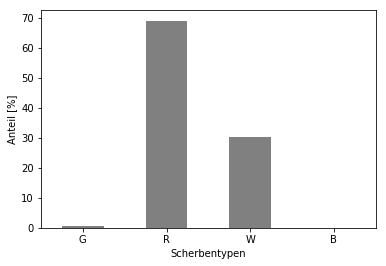

In [11]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Scherbentypen')
plt.ylabel('Anteil [%]')
plt.show()

In [12]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Komplex.bef_nr,
           t_komplex.bef_art
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Anzahl) != '')
           AND ((t_Komplex.bef_art) Not Like '%Ober%'))""".replace('\n',' ')
# Anzahl != damit fotografierte Gefäße nicht mit dabei ist

df = pd.read_sql(sql, con)
df_pivot = df.pivot_table(values = ['objID'], index = ['Ort', 'bef_nr'], aggfunc = len)
df_pivot

objID
Ort                bef_nr       
Munda (Fpl. 304)   87/1        1
Pikunda (Fpl. 255) 87/1        2
                   87/2        1
                   87/3        1

## Fragmentierung

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


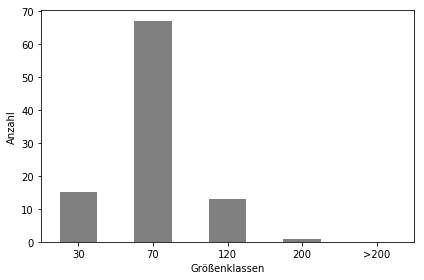

In [13]:
sql = """SELECT
           t_Obj.objID, 
           t_Komplex.bef_nr, 
           t_Obj.Komplex, 
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Anzahl) != '')
           AND ((t_Obj.Gr_Clist) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
# Leerstellen in 'Typ' ersetzen
# df['Typ'] = df['Typ'].replace('','(?)')
# df['Tiefe'] = df['Tiefe'].replace('', np.nan) 
# df = df.dropna(subset=['Tiefe'])
# display(df.head())

df_pivot = df.pivot_table(values = 'objID', index = 'Gr_Clist', aggfunc = len)
custom_dict = {30:30, 70:70, 120:120, 200:200, 500:500}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot = df_pivot.rename(index={500: '>200'})

df_pivot = pd.DataFrame(df_pivot)
df_pivot['%'] = df_pivot['objID']/df_pivot['objID'].sum()*100

df_pivot['objID'].plot(kind = 'bar', color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Größenklassen')
plt.ylabel('Anzahl')
plt.tight_layout()
#plt.savefig('../output/figs/9-12_MUN87-1_KeramikFragmentierung.pdf')
plt.show()

In [14]:
df_pivot

,objID,%
30,15.0,15.625000
70,67.0,69.791667
120,13.0,13.541667
200,1.0,1.041667
>200,NaN,NaN


## Technologische Merkmale (*fabrics*)

In [75]:
sql = """SELECT
           t_Obj.objID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Obj.Anzahl,
           t_Obj.MagerungGröße,
           t_Obj.MagerungArt,
           t_Obj.MagerungDichte,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [76]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


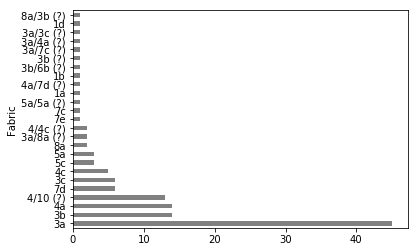

In [77]:
df_pivot.plot(kind = 'barh', legend = False, color = 'Grey')
plt.show()

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


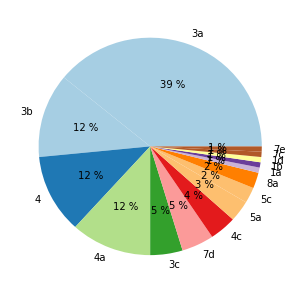

In [78]:
df1 = df.dropna(subset = ['Fabric'])
df1['Fabric'] = df1['Fabric'].map(lambda x: x.rstrip(' (?)'))
df1['Fabric'] = df1['Fabric'].apply(lambda x: x.split('/')[0])\

a = df1.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
a = pd.DataFrame(a)
a = a.sort_index(by=['Anzahl'], ascending=[False])

fig = plt.figure()
fig.set_size_inches(5, 5)
a['Anzahl'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [86]:
a = pd.Series({'1':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("1")]),
               '2':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("2")]),
               '3':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("3")]),
               '4':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("4")]),
               '5':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("5")]),
               '6':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("6")]),
               '7':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("7")]),
               '8':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("8")]),
               '9':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("9")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
1,3,2.34375
2,0,0.00000
3,72,56.25000
4,35,27.34375
5,7,5.46875
6,0,0.00000
7,8,6.25000
8,3,2.34375
9,0,0.00000


In [19]:
df = df.replace('<1','sehr wenig', regex=True)

a = df.loc[df['MagerungDichte'] != ''] # nur Einträgen, bei denen diese Felder ausgefüllt sind
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungDichte', aggfunc = sum)
custom_dict = {'sehr wenig':0,'wenig':1,'mittel':3,'viel':4, 'sehr viel':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
sehr wenig,2,2.298851
wenig,5,5.747126
mittel,21,24.137931
viel,36,41.379310
sehr viel,23,26.436782


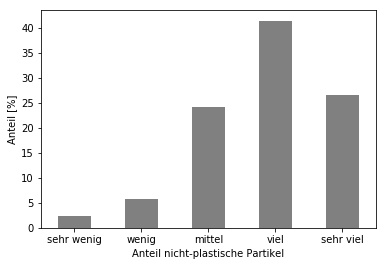

In [20]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Anteil nicht-plastische Partikel')
plt.ylabel('Anteil [%]')
plt.show()

In [21]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungGröße', aggfunc = sum)
custom_dict = {'VF':0,'F':1,'M':3,'C':4, 'VC':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
VF,2,2.247191
F,1,1.123596
M,21,23.595506
C,48,53.932584
VC,17,19.101124


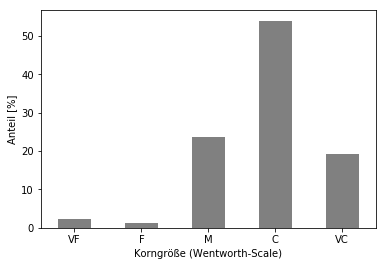

In [22]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Korngröße (Wentworth-Scale)')
plt.ylabel('Anteil [%]')
plt.show()

In [23]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungArt', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Anzahl,Prozent
MagerungArt,,
S,68,76.404494
S/Laterit,12,13.483146
S/Gl,2,2.247191
S/Schamott?,2,2.247191
Laterit,1,1.123596
S/Laterit (?),1,1.123596
S/Org,1,1.123596
S/Schamott,1,1.123596
viel,1,1.123596


### Brennfarbe

In [24]:
sql = """SELECT
           t_Obj.objID,
           [t_Obj].[Außenfarbe] || '/' || [t_Obj].[Prof_aussen] || '/' || [t_Obj].[Prof_Kern] || '/' || [t_Obj].[Prof_innen] || '/' || [t_Obj].[Innenfarbe] AS Farbe
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')
df = pd.read_sql(sql, con)

a = pd.Series({'Weiß':len(df[df['Farbe'].str.contains("W")].index),
               'Rot':len(df[df['Farbe'].str.contains("R")].index),
               'Sonstig':len(df[~df['Farbe'].str.contains("W|R")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Rot,27,25.714286
Sonstig,46,43.809524
Weiß,32,30.476190


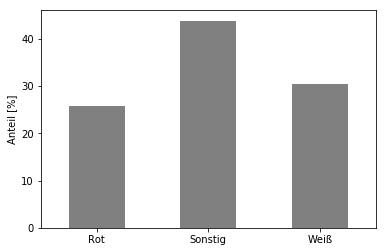

In [25]:
a.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.ylabel('Anteil [%]')
plt.show()

In [26]:
# Sontiges:
a = df[~df['Farbe'].str.contains("W|R")]
pd.Series(' '.join(a['Farbe']).lower().split('/')).value_counts()[:10]

bg       60
g        53
         33
br       29
s        24
bg bg     7
g bg      7
          5
 bg       4
bg g      3
dtype: int64

### Oberfläche der Scherben

In [27]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Obfl,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Obfl', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Anzahl,Prozent
Obfl,,
glatt,14,15.384615
glatt/leicht rau,3,3.296703
leicht glatt,1,1.098901
leicht rau,50,54.945055
leicht rau/sandig?,1,1.098901
rau,22,24.175824


### Wandungsdicke

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


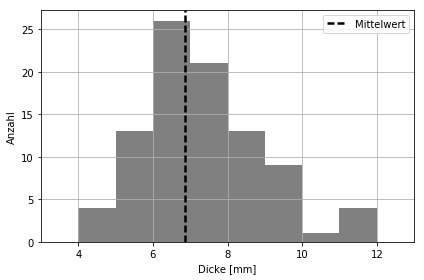

In [28]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Wandung 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Wandung'] = df['Wandung'].convert_objects(convert_numeric=True)

# Spannweite ermitteln und als bins nutzen
bins = df['Wandung'].max() - df['Wandung'].min()

mean = df['Wandung'].mean()

df['Wandung'].hist(bins = bins, color = 'grey', histtype='stepfilled')
plt.axvline(mean, color = 'black', ls = 'dashed', lw = 2.5)
plt.xlabel("Dicke [mm]")
plt.ylabel("Anzahl")
plt.xlim([df['Wandung'].min()-1,df['Wandung'].max()+1])
legend = plt.legend(["Mittelwert"])
legend.get_frame().set_facecolor('white')
plt.tight_layout()

In [29]:
df['Wandung'].describe()

count    91.000000
mean      6.868132
std       1.674706
min       4.000000
25%       6.000000
50%       7.000000
75%       8.000000
max      12.000000
Name: Wandung, dtype: float64

In [30]:
np.var(df['Wandung'])

2.773819587006402

## Gefäßformen

In [87]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [88]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)
# display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


In [89]:
df_pivot['objID'].sum()

66

In [90]:
df_pivot['GefForm'] = df_pivot.index
a = pd.Series({'sicher':sum(df_pivot['objID'].loc[~df_pivot['GefForm'].str.contains(" ")]),
               'fraglich':sum(df_pivot['objID'].loc[df_pivot['GefForm'].str.contains(" ")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,14,21.212121
sicher,52,78.787879


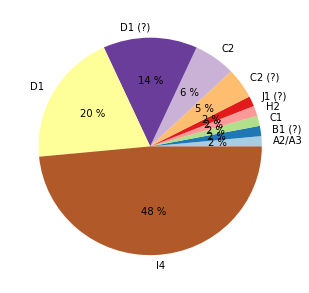

In [91]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

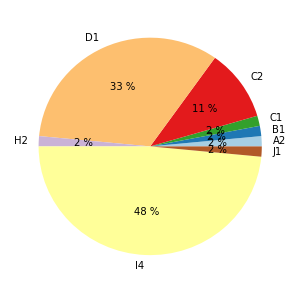

In [93]:
df1 = df.dropna(subset = ['Form_Gef'])
df1['Form_Gef'] = df1['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
df1['Form_Gef'] = df1['Form_Gef'].apply(lambda x: x.split('/')[0])

df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)

fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [94]:
len(df_pivot['objID'])    # Anzahl sicherer Gefäßformen

8

In [100]:
sql = """SELECT
           [t_Ort].[ort_kurz] || ' ' || [t_Komplex].[bef_nr] || ':' || [t_Obj].[Individuum] AS Ind,
           t_Obj.muendungsD,
           t_Obj.muendungsH,
           t_Obj.minD,
           t_Obj.minD_H,
           t_Obj.maxD,
           t_Obj.maxD_H,
           t_Obj.bodenD,
           t_obj.Form_Gef
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['muendungsD'] = df['muendungsD'].convert_objects(convert_numeric=True)
df['muendungsH'] = df['muendungsH'].convert_objects(convert_numeric=True)
df['minD'] = df['minD'].convert_objects(convert_numeric=True)
df['minD_H'] = df['minD_H'].convert_objects(convert_numeric=True)
df['maxD'] = df['maxD'].convert_objects(convert_numeric=True)
df['maxD_H'] = df['maxD_H'].convert_objects(convert_numeric=True)
df['bodenD'] = df['bodenD'].convert_objects(convert_numeric=True)

# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['maxD-muendH'] = df['maxD'] / df['muendungsH']
# Verhältnis aus Mündungsdurchmesser / Minimaler Durchmesser
df['muend-min'] = df['muendungsD'] / df['minD']
# Verhältnis aus Maximaler Durchmesser / Minimaler Durchmesser
df['max-min'] = df['maxD'] / df['maxD']

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta

In [96]:
a = df.loc[df['Form_Gef'].str.contains("D1")] 
b = df.loc[~df['Form_Gef'].str.contains("I4")] 

In [97]:
a.describe()

,muendungsD,muendungsH,minD,minD_H,maxD,maxD_H,bodenD,maxD-muendH,muend-min,max-min
count,9.000000,1.0,20.000000,1.0,15.000000,1.0,0.0,1.000000,9.000000,15.0
mean,14.666667,11.5,12.950000,9.0,21.366667,5.0,NaN,1.608696,1.109161,1.0
std,2.250000,NaN,1.761429,NaN,3.930043,NaN,NaN,NaN,0.057279,0.0
min,12.000000,11.5,8.000000,9.0,12.000000,5.0,NaN,1.608696,1.031250,1.0
25%,13.000000,11.5,12.000000,9.0,19.500000,5.0,NaN,1.608696,1.076923,1.0
50%,14.000000,11.5,13.000000,9.0,21.000000,5.0,NaN,1.608696,1.083333,1.0
75%,16.500000,11.5,14.000000,9.0,24.500000,5.0,NaN,1.608696,1.161290,1.0
max,18.000000,11.5,16.000000,9.0,27.000000,5.0,NaN,1.608696,1.200000,1.0


In [105]:
a.loc[a['muendungsH']==11.5] 

,Ind,muendungsD,muendungsH,minD,minD_H,maxD,maxD_H,bodenD,Form_Gef,maxD-muendH,muend-min,max-min
6,NGA 87/101:47,13.5,11.5,12.5,9.0,18.5,5.0,NaN,D1,1.608696,1.08,1.0


In [106]:
18.5 / 11.5

1.608695652173913

C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


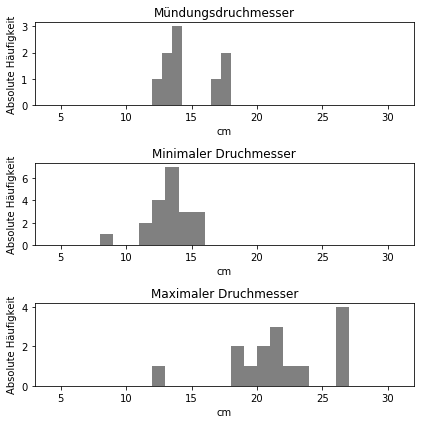

In [111]:
mi = min(round(a['minD'])) - 5
ma = round(max(a['maxD'])) + 5

fig = plt.figure(1)
fig.set_size_inches(6,6)

ax = plt.subplot(311)
bins = round(max(round(a['minD'])) - min(round(a['minD'])))
ax = a['muendungsD'].hist(histtype='stepfilled', bins = bins, fc = 'grey')
plt.title("Mündungsdruchmesser")
plt.xlabel("cm")
plt.ylabel("Absolute Häufigkeit")
plt.xlim(mi,ma) 
ax.xaxis.grid(False)
ax.yaxis.grid(False)
#plt.show()

ax = plt.subplot(312)
bins = round(max(a['minD']) - min(a['minD']))
ax = a['minD'].hist(histtype='stepfilled', bins = bins, fc = 'grey')
plt.title("Minimaler Druchmesser")
plt.xlabel("cm")
plt.ylabel("Absolute Häufigkeit")
plt.xlim(mi,ma) 
ax.xaxis.grid(False)
ax.yaxis.grid(False)
#plt.show()

ax = plt.subplot(313)
bins = round(max(a['maxD']) - min(a['maxD']))
ax = a['maxD'].hist(histtype='stepfilled', bins = bins, fc = 'grey')
plt.title("Maximaler Druchmesser")
plt.xlabel("cm")
plt.ylabel("Absolute Häufigkeit")
plt.xlim(mi,ma) 
ax.xaxis.grid(False)
ax.yaxis.grid(False)

plt.tight_layout()
#plt.savefig('../output/figs/3-1-2-7_MDB_Proportionen_D1-Gef.pdf', bbox_inches='tight')
plt.show()

In [98]:
b.describe()

,muendungsD,muendungsH,minD,minD_H,maxD,maxD_H,bodenD,maxD-muendH,muend-min,max-min
count,17.000000,3.000000,29.000000,1.0,24.000000,1.0,1.0,1.000000,14.000000,24.0
mean,13.794118,6.166667,13.551724,9.0,21.520833,5.0,0.0,1.608696,1.105580,1.0
std,3.400638,5.033223,3.449495,NaN,3.713896,NaN,NaN,NaN,0.050840,0.0
min,5.500000,1.500000,5.000000,9.0,12.000000,5.0,0.0,1.608696,1.031250,1.0
25%,12.000000,3.500000,12.000000,9.0,19.750000,5.0,0.0,1.608696,1.077692,1.0
50%,13.500000,5.500000,13.000000,9.0,21.000000,5.0,0.0,1.608696,1.090909,1.0
75%,16.500000,8.500000,15.000000,9.0,24.125000,5.0,0.0,1.608696,1.145968,1.0
max,18.000000,11.500000,24.000000,9.0,27.000000,5.0,0.0,1.608696,1.200000,1.0


### Bauchformen

In [38]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Bauch
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Bauch) != '')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)

# die Fragezeichen bei Gef-Form & Bauch-Form einfach löschen
#df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
#df['Form_Bauch'] = df['Form_Bauch'].map(lambda x: x.rstrip(' (?)'))

#display(df.head())

In [39]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Bauch', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Bauch,,
A1,45,83.333333
A2,6,11.111111
A3,2,3.703704
B1,1,1.851852


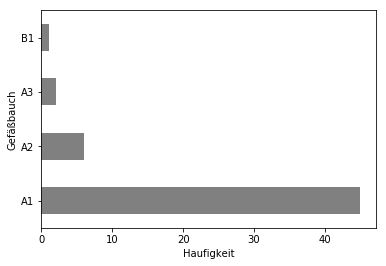

In [40]:
df_pivot.plot(y = 'objID', kind = 'barh', legend=False, color = 'grey')
plt.xlabel('Haufigkeit')
plt.ylabel('Gefäßbauch')

### Korrelation Gef-Form & Bauchform

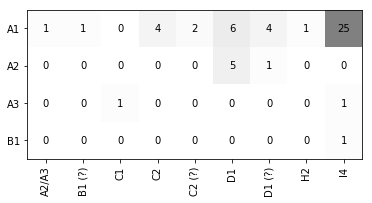

In [41]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Bauch', columns = 'Form_Gef', aggfunc = len, fill_value = 0)
#df_pivot
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.show()

## Mündungs- & Randformen

In [115]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Mdg,
           t_Obj.Form_Rand,
           t_Obj.Form_Hals,
           t_Obj.Form_Schulter
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# leere Werte in NaN ändern
df = df.replace('',np.nan, regex=True)
# display(df.head())

In [116]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Mdg', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Mdg,,
M2,33,49.253731
M1,6,8.955224
M4,6,8.955224
M5,6,8.955224
M3,3,4.477612
M5/M1,3,4.477612
M2 (?),2,2.985075
M2/(M3),2,2.985075
M5/M2,2,2.985075


In [117]:
len(df_pivot['objID'])    # Anzahl beobachtete Mdgformen

13

In [118]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Rand', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Rand,,
B2,45,53.571429
B1,8,9.523810
A3.3,7,8.333333
B1.1,7,8.333333
A2.4,3,3.571429


In [119]:
a = pd.Series({'B':sum(df_pivot["objID"].loc[df_pivot.index.str.contains("B")]),
               'nicht B':sum(df_pivot["objID"].loc[~df_pivot.index.str.contains("B")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
B,68,80.952381
nicht B,16,19.047619


In [120]:
a = pd.Series({'R13':sum(df_pivot["objID"].loc[df_pivot.index.str.contains("R13")]),
               'nicht R13':sum(df_pivot["objID"].loc[~df_pivot.index.str.contains("R13")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
R13,0,0.0
nicht R13,84,100.0


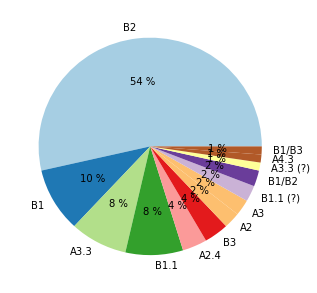

In [121]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [122]:
df_pivot['objID'].sum()   # Anzahl GE mit bestimmter Randform

84

In [123]:
len(df_pivot['objID'])    # Anzahl beobachtete Randformen

13

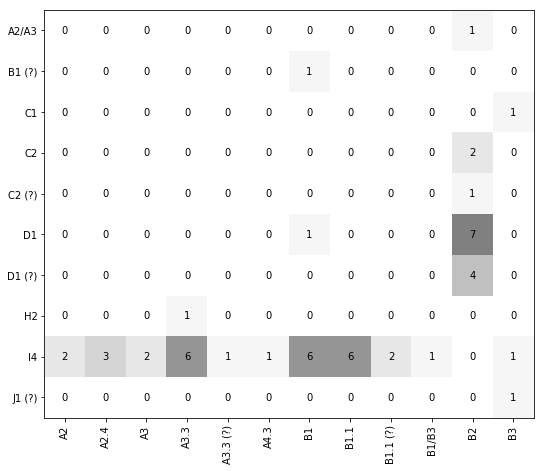

In [124]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', columns = 'Form_Rand', aggfunc = len, fill_value = 0)
fig = plt.figure()
fig.set_size_inches(12, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.show()

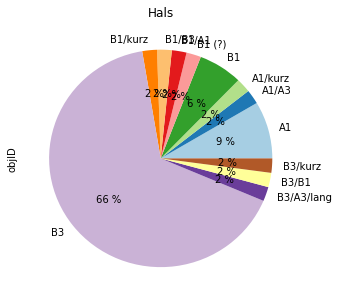

In [52]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Hals', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Hals")

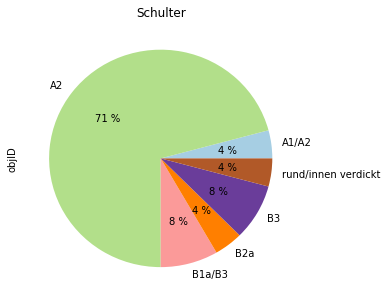

In [53]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Schulter', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Schulter")

### Bodenformen

In [126]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Obj.Form_Boden) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# df

In [130]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Boden', columns='Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
#df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
#df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

Form_Gef,I4
Form_Boden,
B1,19


## Verzierungselemente

In [2]:
(df_pivotBig_perc, df_pivotBig_perc_a, new_cmap) = decoration_positon_matrices_print(style)

C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['n'] = 1
C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:88: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  ab[1] = ab[1].convert_objects(convert_numeric=True)


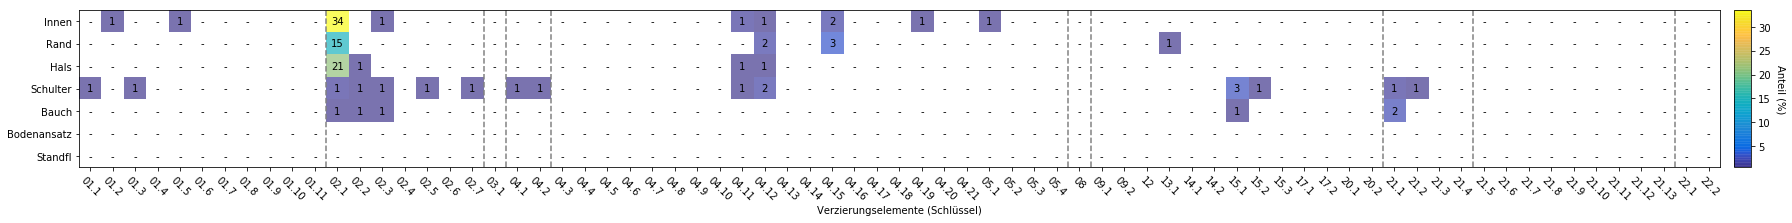

In [3]:
fig = plt.figure()
fig.set_size_inches(25, 15)

ax = plt.gca()
im = ax.imshow(df_pivotBig_perc, interpolation='nearest', cmap=parula_map, alpha=.66)

plt.xlabel('Verzierungselemente (Schlüssel)')
plt.yticks(range(len(df_pivotBig_perc.index)), df_pivotBig_perc.index.str[2:])
plt.xticks(range(len(df_pivotBig_perc.columns)), df_pivotBig_perc.columns, rotation = -45)

for (i, j), z in np.ndenumerate(df_pivotBig_perc_a):
    plt.text(j, i, z, ha='center', va='center')
    
plt.axvline(10.5, color='grey', linestyle = '--')
plt.axvline(17.5, color='grey', linestyle = '--')
plt.axvline(18.5, color='grey', linestyle = '--')
plt.axvline(20.5, color='grey', linestyle = '--')
plt.axvline(43.5, color='grey', linestyle = '--')
plt.axvline(44.5, color='grey', linestyle = '--')
plt.axvline(57.5, color='grey', linestyle = '--')
plt.axvline(61.5, color='grey', linestyle = '--')
plt.axvline(70.5, color='grey', linestyle = '--')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.2)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Anteil (%)', rotation = -90, labelpad = 15)

plt.tight_layout()

plt.savefig('../output/figs/3-1-2-8_Konda_VerzierungselmenteAlle.pdf', bbox_inches='tight')
plt.show()

In [58]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzName_alt,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [59]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len)
df_pivot = df_pivot.fillna(0)
# Sortierung für graphische Darstellung umdrehen
df_pivot = df_pivot.sort_index(ascending=True)
# heatmap siehe http://yonatanfriedman.com/docs/survey/plotting.html

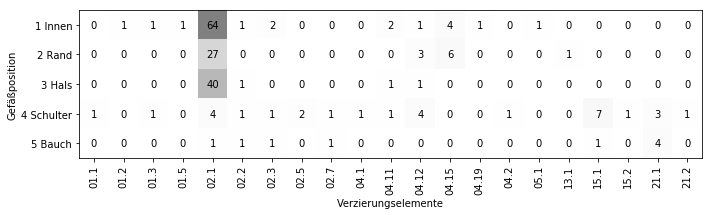

In [60]:
fig = plt.figure()
fig.set_size_inches(10, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.savefig('../output/figs/3-1-2-8_Konda_Verzierungselmente.pdf', bbox_inches='tight')
plt.show()

In [61]:
df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


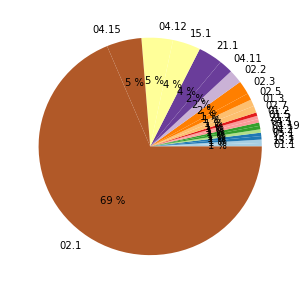

In [62]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')

In [63]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot['Prozent'] = df_pivot["objID"]/df_pivot["objID"].sum()*100
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = False)
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
pos,,
1 Innen,79,39.898990
3 Hals,43,21.717172
2 Rand,37,18.686869
4 Schulter,30,15.151515
5 Bauch,9,4.545455


In [64]:
a = pd.Series({'Roulette-Verzierung':len(df.loc[df['verzName'].str.contains("21.")].index),
               'Weitere Verzierungen':len(df.loc[~df['verzName'].str.contains("21.")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Roulette-Verzierung,8,4.040404
Weitere Verzierungen,190,95.959596


In [65]:
# nur Roulette-Verzierungen herausfiltern
b = df.loc[df['verzName'].str.contains("21.")]

c = pd.Series({'vegetabilisches Roulette':len(b.loc[df['verzName_alt'].str.contains("V08a")].index),
               'Schnitz-Roulette':len(b.loc[~df['verzName_alt'].str.contains("V08a")].index)})
c = pd.DataFrame(c)
c['Prozent'] = c[0]/c[0].sum()*100
c

,0,Prozent
Schnitz-Roulette,0,0.0
vegetabilisches Roulette,8,100.0


#### Nur Roulette

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


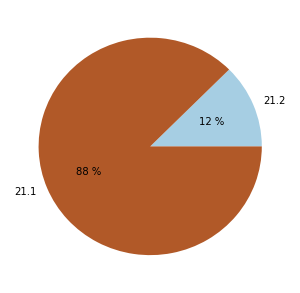

In [131]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) Like '%21.%')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')

In [132]:
df

,objID,posID,verzID,pos,verzName,verzBeschr,Typ,Form_Gef
0,3074,7,23,5 Bauch,21.1,vegetabilisches Roulette/Knotted String,KON,C2 (?)
1,4081,7,23,5 Bauch,21.1,vegetabilisches Roulette/Knotted String,KON/PDM (?),None
2,4082,6,23,4 Schulter,21.1,vegetabilisches Roulette/Knotted String,KON/PDM (?),D1 (?)
3,4082,7,23,5 Bauch,21.1,vegetabilisches Roulette/Knotted String,KON/PDM (?),D1 (?)
4,4566,6,23,4 Schulter,21.1,vegetabilisches Roulette/Knotted String,PDM/KON (?),D1
5,5251,6,76,4 Schulter,21.2,Twisted String,KON,C2
6,5394,6,23,4 Schulter,21.1,vegetabilisches Roulette/Knotted String,KON (?),None
7,5394,7,23,5 Bauch,21.1,vegetabilisches Roulette/Knotted String,KON (?),None


In [135]:
len(df['objID'].unique())

6

#### Nicht Roulette

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


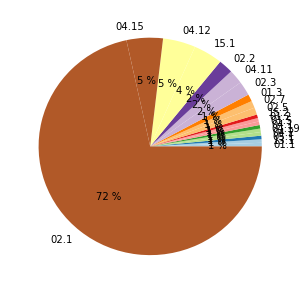

In [67]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) Not Like '%21.%')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')

## Verbreitung

In [136]:
df = style_mapping_gis_export(style)
df.sort_values(['Kat-Nr'])

Typ,Ort,Kat-Nr,X,Y,TYP
19,Pikunda (Fpl. 255),255,16.635736,0.549344,KON (?)
6,Molanda (Fpl. 258),258,16.537896,0.945646,KON
3,Mandombe (Fpl. 259),259,16.522700,1.116917,KON
1,Ikelemba (Fpl. 260),260,16.504824,1.227166,KON (?)
12,Motoli (Fpl. 261),261,16.467736,1.227602,KON (?)
7,Mosanya (Fpl. 262),262,16.447391,1.213000,KON
12,Sangha Fkm 428 (Fpl. 263),263,16.443523,1.250183,KON
4,Matoto (Fpl. 264),264,16.431282,1.281643,KON
10,Ouesso (Fpl. 265),265,16.057202,1.617344,KON
0,Gatongo (Fpl. 266),266,16.129714,1.687760,KON (?)


In [137]:
df.to_csv("../data/processed/3-1-2-8_KON_Verbreitung.csv", index = False)

In [138]:
len(df)

21

## Tafeln

In [74]:
sql = """SELECT
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Obj.Typ,
           t_Obj.Scherbe,
           t_Obj.Form_Gef,
           t_Obj.Form_Rand,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='inner')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,Typ,Scherbe,Form_Gef,Form_Rand,Form_Boden
0,49,18,PIK,87/3,NaN,-X:22,KON (?),R,I4,B1.1 (?),None
1,55,2,PIK,87/101,NaN,168,NGB/KON (?),R,None,B1.1,None
2,57,12,MDB,87/101,NaN,103,KON (?),None,D1 (?),None,None
3,57,13,MDB,87/101,NaN,142,MDB/KON (?),None,D1,None,None
4,57,14,MDB,87/101,NaN,171,KON,None,None,None,None
5,57,19,MDB,87/101,NaN,38,KON (?),R,J1 (?),B3,None
6,57,22,MDB,87/101,NaN,14,KON (?),R,I4,A3.3,B1
7,57,23,MDB,87/101,NaN,35,KON (?),R,I4,A4.3,B1
8,60,8,MAT,87/101,NaN,11,KON,R,None,B2,None
9,60,21,MAB,87/101,NaN,5,PDM/KON (?),R,I4,A2.4,None
